In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# Training set dataframe
df_train = pd.read_csv('train.csv', encoding = 'ISO-8859-1', low_memory=False)
df_train.set_index('ticket_id', inplace=True)

# Test set dataframe
df_test = pd.read_csv('test.csv', encoding = 'ISO-8859-1', low_memory=False)
df_test.set_index('ticket_id', inplace=True)

# Ticket_ID to address dataframe
df_address = pd.read_csv('addresses.csv', encoding = 'ISO-8859-1', low_memory=False)
df_address.set_index('ticket_id', inplace=True)

# Address to geographical coordinates dataframe
df_latlon = pd.read_csv('latlons.csv',  encoding = 'ISO-8859-1', low_memory=False)

The number of rows in the train + test dataframes match the ones in address.

In [20]:
print('Total number of rows in train + test data: ' + str(df_train.shape[0] + df_test.shape[0]))
print('Total number of addresses: ' + str(df_address.shape[0]))
print('Total number of geolocations: ' + str(df_latlon.shape[0]))

Total number of rows in train + test data: 311307
Total number of addresses: 311307
Total number of geolocations: 121769


In [21]:
df_train.describe()

,violation_street_number,violation_zip_code,mailing_address_str_number,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,compliance
count,2.503060e+05,0.0,2.467040e+05,250305.000000,250306.000000,250306.000000,250306.000000,250306.000000,250306.0,250306.000000,250306.000000,250306.000000,159880.000000
mean,1.064986e+04,NaN,9.149788e+03,374.423435,12.774764,6.387382,21.494506,0.125167,0.0,268.685356,48.898986,222.449058,0.072536
std,3.188733e+04,NaN,3.602034e+04,707.195807,9.607344,4.803672,56.464263,3.430178,0.0,626.915212,222.422425,606.394010,0.259374
min,0.000000e+00,NaN,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-7750.000000,0.000000
25%,4.739000e+03,NaN,5.440000e+02,200.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.024400e+04,NaN,2.456000e+03,250.000000,20.000000,10.000000,10.000000,0.000000,0.0,140.000000,0.000000,25.000000,0.000000
75%,1.576000e+04,NaN,1.292725e+04,250.000000,20.000000,10.000000,25.000000,0.000000,0.0,305.000000,0.000000,305.000000,0.000000
max,1.415411e+07,NaN,5.111345e+06,10000.000000,20.000000,10.000000,1000.000000,350.000000,0.0,11030.000000,11075.000000,11030.000000,1.000000


In [22]:
df_train = df_train.merge(df_address, on='ticket_id', how='inner') # merge the address dataframe to training set
                                                                   # on the ticket_id column using an inner merge

df_test = df_test.merge(df_address, on='ticket_id', how='inner')

The data needs to be cleaned up a bit. Since NaN values in compliance indicate violator was found not responsible, the rows can be dropped using dropna(). Also, the violation_street_number and mailing_address_str_number are in decimals, which is odd for street numbers. These are converted to integers.

In [23]:
df_train.dropna(subset=['compliance'], inplace=True)

In [24]:
df_train.head()

,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,state,...,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance,address
ticket_id,,,,,,,,,,,,,,,,,,,,,
22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,IL,...,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,"2900 tyler, Detroit MI"
27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,MI,...,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0,"4311 central, Detroit MI"
22046,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","KASIMU, UKWELI",6478.0,NORTHFIELD,NaN,2755.0,E. 17TH,LOG BEACH,CA,...,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,"6478 northfield, Detroit MI"
18738,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Deerwood Development Group Inc, Deer",8027.0,BRENTWOOD,NaN,476.0,Garfield,Clinton,MI,...,855.0,0.0,855.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,"8027 brentwood, Detroit MI"
18735,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Rafee Auto Services L.L.C., RAF",8228.0,MT ELLIOTT,NaN,8228.0,Mt. Elliott,Detroit,MI,...,140.0,0.0,140.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,"8228 mt elliott, Detroit MI"


In [25]:
non_comp = df_train['compliance'].value_counts()[0]
comp = df_train['compliance'].value_counts()[1]

comp_ratio = comp / (comp + non_comp) 

print('Number of compliances is ' + str(comp))
print('The compliance ratio in the dataset is ' + str(comp_ratio))

Number of compliances is 11597
The compliance ratio in the dataset is 0.07253565173880411


The ratio of compliance in the dataset is a meagre 7.2%, which indicates a great imbalance between the two classes.

In [26]:
df_train.columns

Index(['agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance', 'address'],
      dtype='object')

Not all attributes are useful in creating a predictive model. So we keep a certain subset of them that will be helpful. We also get rid of certain features to reduce data leakage. We can check which columns contain mostly NaN values (shown in white) using the heatmap below.

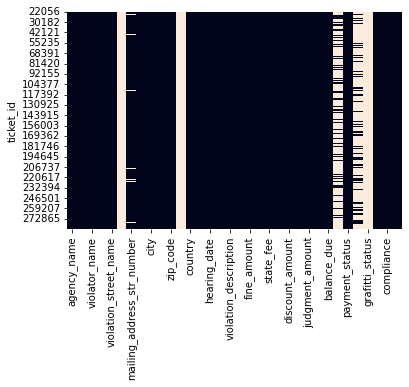

In [27]:
import seaborn as sns

sns.heatmap(df_train.isnull(), cbar=False)
plt.show()

In [28]:
# Using only the followin columns in the training data

cols_to_use = ['agency_name', 'violation_code', 'disposition', 'fine_amount', 'judgment_amount', 'late_fee', 'admin_fee', 'discount_amount', 'compliance']

df_train = df_train[cols_to_use]

In [29]:
df_train.head()

,agency_name,violation_code,disposition,fine_amount,judgment_amount,late_fee,admin_fee,discount_amount,compliance
ticket_id,,,,,,,,,
22056,"Buildings, Safety Engineering & Env Department",9-1-36(a),Responsible by Default,250.0,305.0,25.0,20.0,0.0,0.0
27586,"Buildings, Safety Engineering & Env Department",61-63.0600,Responsible by Determination,750.0,855.0,75.0,20.0,0.0,1.0
22046,"Buildings, Safety Engineering & Env Department",9-1-36(a),Responsible by Default,250.0,305.0,25.0,20.0,0.0,0.0
18738,"Buildings, Safety Engineering & Env Department",61-63.0500,Responsible by Default,750.0,855.0,75.0,20.0,0.0,0.0
18735,"Buildings, Safety Engineering & Env Department",61-63.0100,Responsible by Default,100.0,140.0,10.0,20.0,0.0,0.0


In [30]:
df_train['disposition'].unique()

array(['Responsible by Default', 'Responsible by Determination',
       'Responsible by Admission', 'Responsible (Fine Waived) by Deter'],
      dtype=object)

In [38]:
df_train.groupby('agency_name').agg('count')

,violation_code,disposition,fine_amount,judgment_amount,late_fee,admin_fee,discount_amount,compliance
agency_name,,,,,,,,
"Buildings, Safety Engineering & Env Department",95863,95863,95863,95863,95863,95863,95863,95863
Department of Public Works,52445,52445,52445,52445,52445,52445,52445,52445
Detroit Police Department,4464,4464,4464,4464,4464,4464,4464,4464
Health Department,7107,7107,7107,7107,7107,7107,7107,7107
Neighborhood City Halls,1,1,1,1,1,1,1,1


In [55]:
df_train.groupby('disposition').agg('count')

,agency_name,violation_code,fine_amount,judgment_amount,late_fee,admin_fee,discount_amount,compliance
disposition,,,,,,,,
Responsible (Fine Waived) by Deter,195,195,195,195,195,195,195,195
Responsible by Admission,13701,13701,13701,13701,13701,13701,13701,13701
Responsible by Default,138340,138340,138340,138340,138340,138340,138340,138340
Responsible by Determination,7644,7644,7644,7644,7644,7644,7644,7644


In [95]:
df_train.groupby('disposition')['compliance'].value_counts().to_dict()

{('Responsible (Fine Waived) by Deter', 1.0): 195,
 ('Responsible by Admission', 0.0): 9933,
 ('Responsible by Admission', 1.0): 3768,
 ('Responsible by Default', 0.0): 133055,
 ('Responsible by Default', 1.0): 5285,
 ('Responsible by Determination', 0.0): 5295,
 ('Responsible by Determination', 1.0): 2349}

Let's perform some exploratory data analysis. We first check how much fine violators are likely to incur. As a reference, the largest fine in the training dataset is $10,000.

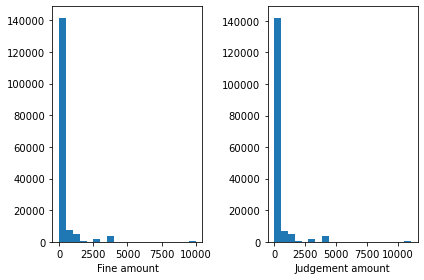

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(df_train['fine_amount'], bins=20)
ax1.set_xlabel('Fine amount')

ax2.hist(df_train['judgment_amount'], bins=20)
ax2.set_xlabel('Judgement amount')

fig.tight_layout()
plt.show()

If we shrink down the range of fines, we see that most fines less than $500.

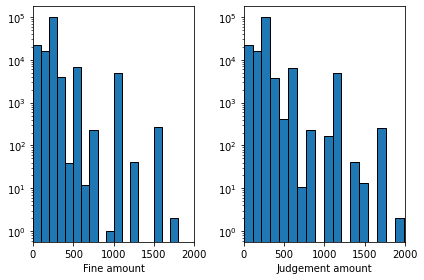

In [34]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(df_train['fine_amount'], bins=100, edgecolor='black')
ax1.set_xlabel('Fine amount')
ax1.set_xlim(0, 2000)
ax1.set_yscale('log')

ax2.hist(df_train['judgment_amount'], bins=100, edgecolor='black')
ax2.set_xlabel('Judgement amount')
ax2.set_xlim(0, 2000)
ax2.set_yscale('log')

fig.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp/ipykernel_10360/2660372772.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(agency_list, rotation=90)
C:\Users\Dell\AppData\Local\Temp/ipykernel_10360/2660372772.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(disposition_list,rotation=90)


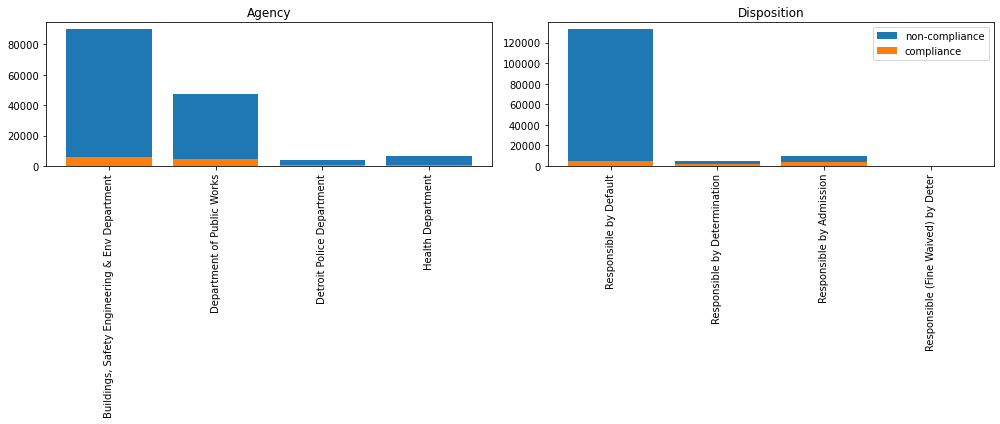

In [144]:
# We define a function that extracts the number of compliances and non-compliances given a particular 'feature' (first argument)
# I am sure there is an easier way to do this...but couldn't figure it out

def compliance_by_feature(feature, feature_list):

    compliance = []
    non_compliance = []

    for item in feature_list:

        test = df_train[df_train[feature] == item]

        if test['compliance'].all() == False:

            nc = test['compliance'].value_counts()[0]
            c = test['compliance'].value_counts()[1]

            non_compliance.append(nc)
            compliance.append(c)
        
        else:

            if test['compliance'].iloc[0] == 0:

                nc = test['compliance'].value_counts()[1]

                non_compliance.append(nc)
                compliance.append(0)

            else:

                c = test['compliance'].value_counts()[1]

                compliance.append(c)
                non_compliance.append(0)

        del test

    return compliance, non_compliance

agency_list = ['Buildings, Safety Engineering & Env Department', 'Department of Public Works',
                'Detroit Police Department', 'Health Department'] # This excludes Neighborhood City Hall since it has only one occurance

disposition_list = df_train['disposition'].unique().tolist()

comp1, non_comp1 = compliance_by_feature('agency_name', agency_list)
comp2, non_comp2 = compliance_by_feature('disposition', disposition_list)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

ax1.bar(agency_list, non_comp1, label='non-compliance')
ax1.bar(agency_list, comp1, label='compliance')
ax1.set_xticklabels(agency_list, rotation=90)
ax1.set_title('Agency')

ax2.bar(disposition_list, non_comp2, label='non-compliance')
ax2.bar(disposition_list, comp2, label='compliance')
ax2.set_xticklabels(disposition_list,rotation=90)
ax2.set_title('Disposition')

plt.legend()
fig.tight_layout()
plt.show()



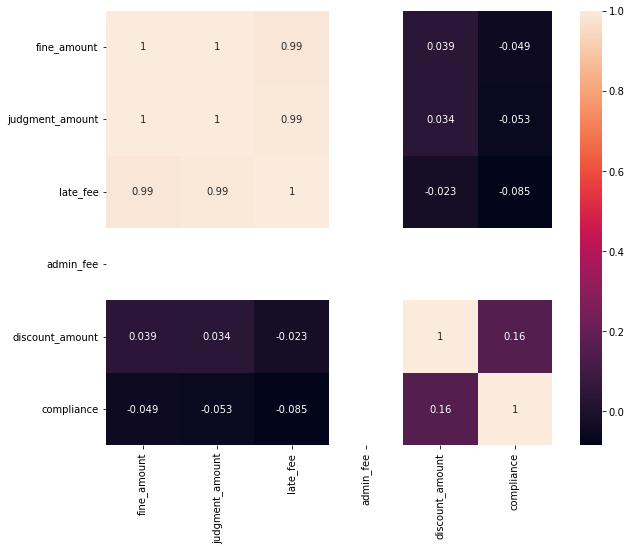

In [160]:
corr_matrix = df_train.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

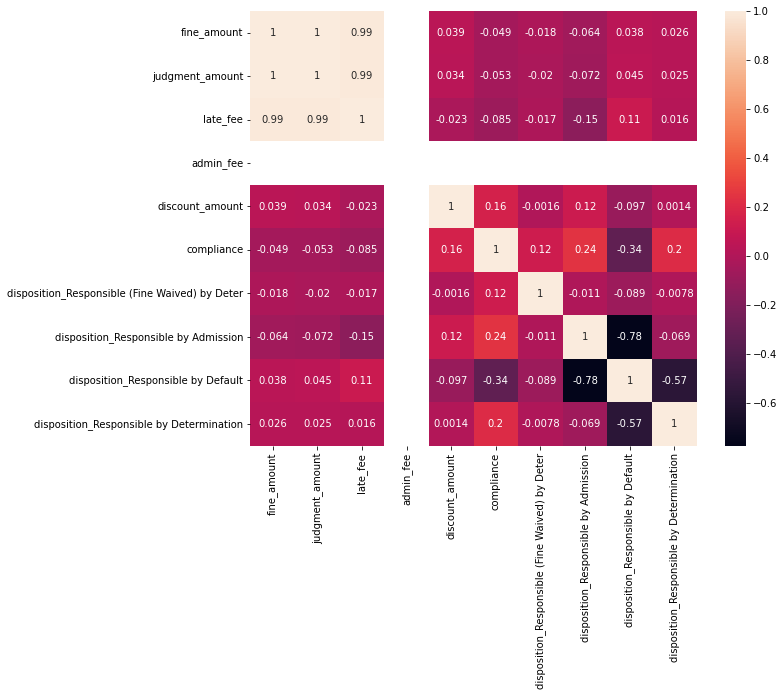

In [159]:
# We include the correlation between the compliance and the different classes 
# of disposition. The disposition classes are converted to numbers using get_dummies()

df_dummy = pd.get_dummies(df_train, columns=['disposition'])

corr_matrix2 = df_dummy.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix2, annot=True)
plt.show()

We already have a training dataframe, so we do not have to do a split. What we have to do is take the training data and remove the 'compliance' column to create X_train and the 'compliance' column will serve as y_train. We first try to simplify the task by only considering the various fees and fines (numerical data) in the attributes. That means in addition to previously dropped columns, we now drop 'agency_name', 'violation_code' and 'disposition'. These may have an effect on the eventual result, but for now we are ignoring them.

In [175]:
# Some preprocessing

X_train = df_train.drop(['agency_name', 'violation_code', 'disposition', 'compliance'], axis='columns')
y_train = df_train['compliance']

cols_to_use_test = ['fine_amount', 'judgment_amount', 'late_fee', 'admin_fee', 'discount_amount']
X_test = df_test[cols_to_use_test]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression